<a href="https://colab.research.google.com/github/carolinehagood/ds4002-project3/blob/main/CNN-40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import requests
from io import BytesIO
import gzip
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [136]:
#Downloading url images
file_urls = ['https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02085936-Maltese_dog%20(3).csv.gz',
             'https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02088364-beagle%20(1).csv.gz',
             'https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02099601-golden_retriever%20(1).csv.gz',
             'https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02106662-German_shepherd%20(2).csv.gz'
             ]
data_frames = []
for url in file_urls:
    response = requests.get(url)
    compressed_file = BytesIO(response.content)  # Create a BytesIO object
    with gzip.open(compressed_file, 'rt') as f:  # Open it as a text file
        df = pd.read_csv(f)  # Read the CSV file into a DataFrame
        data_frames.append(df)

In [137]:
# Combine all DataFrames into a single DataFrame
data_df = pd.concat(data_frames, ignore_index=True)

# Print the DataFrame to check
print(data_df.head(1))

          0         1         2         3        4         5         6  \
0  0.141176  0.133333  0.082353  0.156863  0.14902  0.098039  0.164706   

          7         8         9  ...     49144     49145     49146     49147  \
0  0.156863  0.105882  0.172549  ...  0.223529  0.180392  0.188235  0.172549   

     49148     49149     49150     49151  breed             breed_name  
0  0.12549  0.164706  0.141176  0.098039      0  n02085936-Maltese_dog  

[1 rows x 49154 columns]


In [138]:
data_df.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
49149,float64
49150,float64
49151,float64
breed,int64


In [139]:
data_df['breed_name'] = data_df['breed_name'].str.split('-').str[1]

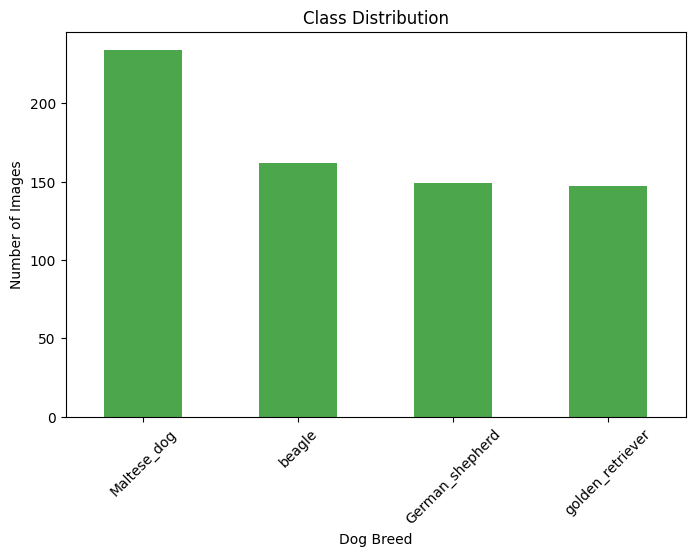

In [140]:
#class distribution
import matplotlib.pyplot as plt

# Count the number of samples per breed
class_counts = data_df['breed_name'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Class Distribution")
plt.xlabel("Dog Breed")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

In [141]:
data_df[['breed_name', 'breed']].groupby('breed_name').count()

,breed
breed_name,
German_shepherd,149
Maltese_dog,234
beagle,162
golden_retriever,147


In [142]:
data_df_shepherd= data_df[data_df['breed_name'] == 'German_shepherd']
data_df_shepherd= data_df_shepherd[0: 147]
data_df_beagle= data_df[data_df['breed_name'] == 'beagle']
data_df_beagle
data_df_maltese= data_df[data_df['breed_name'] == 'Maltese_dog']
data_df_retriever= data_df[data_df['breed_name'] == 'golden_retriever']
data_df_shepherd

,0,1,2,3,4,5,6,7,8,9,...,49144,49145,49146,49147,49148,49149,49150,49151,breed,breed_name
543,0.552941,0.592157,0.639216,0.552941,0.592157,0.639216,0.552941,0.592157,0.639216,0.549020,...,0.627451,0.650980,0.619608,0.631373,0.662745,0.607843,0.619608,0.654902,3,German_shepherd
544,0.725490,0.631373,0.619608,0.737255,0.639216,0.631373,0.764706,0.662745,0.654902,0.839216,...,0.454902,0.294118,0.439216,0.450980,0.317647,0.474510,0.470588,0.364706,3,German_shepherd
545,0.678431,0.749020,0.450980,0.694118,0.768627,0.458824,0.705882,0.780392,0.462745,0.717647,...,0.231373,0.266667,0.149020,0.160784,0.188235,0.101961,0.121569,0.141176,3,German_shepherd
546,0.752941,0.847059,0.545098,0.705882,0.784314,0.494118,0.792157,0.850980,0.576471,0.741176,...,0.968627,0.980392,0.949020,0.972549,0.980392,0.949020,0.972549,0.980392,3,German_shepherd
547,0.725490,0.749020,0.733333,0.882353,0.901961,0.886275,0.905882,0.929412,0.913725,0.905882,...,0.874510,0.878431,0.847059,0.847059,0.847059,0.847059,0.839216,0.850980,3,German_shepherd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.031373,0.027451,0.035294,0.192157,0.184314,0.196078,0.207843,0.203922,0.211765,0.196078,...,0.137255,0.133333,0.156863,0.149020,0.149020,0.035294,0.035294,0.035294,3,German_shepherd
686,0.847059,0.803922,0.768627,0.854902,0.811765,0.776471,0.862745,0.819608,0.788235,0.874510,...,0.615686,0.662745,0.580392,0.596078,0.643137,0.580392,0.592157,0.643137,3,German_shepherd
687,0.278431,0.317647,0.262745,0.349020,0.368627,0.349020,0.254902,0.254902,0.239216,0.270588,...,0.647059,0.486275,0.670588,0.580392,0.431373,0.694118,0.619608,0.466667,3,German_shepherd
688,0.537255,0.627451,0.352941,0.541176,0.631373,0.356863,0.513725,0.615686,0.337255,0.521569,...,0.415686,0.168627,0.345098,0.447059,0.172549,0.341176,0.447059,0.168627,3,German_shepherd


In [143]:
data_df_concat= pd.concat([data_df_shepherd, data_df_beagle[0:147], data_df_maltese[0:147], data_df_retriever[0:147]])
data_df_concat

,0,1,2,3,4,5,6,7,8,9,...,49144,49145,49146,49147,49148,49149,49150,49151,breed,breed_name
543,0.552941,0.592157,0.639216,0.552941,0.592157,0.639216,0.552941,0.592157,0.639216,0.549020,...,0.627451,0.650980,0.619608,0.631373,0.662745,0.607843,0.619608,0.654902,3,German_shepherd
544,0.725490,0.631373,0.619608,0.737255,0.639216,0.631373,0.764706,0.662745,0.654902,0.839216,...,0.454902,0.294118,0.439216,0.450980,0.317647,0.474510,0.470588,0.364706,3,German_shepherd
545,0.678431,0.749020,0.450980,0.694118,0.768627,0.458824,0.705882,0.780392,0.462745,0.717647,...,0.231373,0.266667,0.149020,0.160784,0.188235,0.101961,0.121569,0.141176,3,German_shepherd
546,0.752941,0.847059,0.545098,0.705882,0.784314,0.494118,0.792157,0.850980,0.576471,0.741176,...,0.968627,0.980392,0.949020,0.972549,0.980392,0.949020,0.972549,0.980392,3,German_shepherd
547,0.725490,0.749020,0.733333,0.882353,0.901961,0.886275,0.905882,0.929412,0.913725,0.905882,...,0.874510,0.878431,0.847059,0.847059,0.847059,0.847059,0.839216,0.850980,3,German_shepherd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.274510,0.164706,0.117647,0.274510,0.164706,0.117647,0.270588,0.168627,0.117647,0.258824,...,0.380392,0.341176,0.411765,0.392157,0.349020,0.419608,0.411765,0.364706,2,golden_retriever
539,0.215686,0.254902,0.160784,0.215686,0.250980,0.164706,0.243137,0.278431,0.203922,0.247059,...,0.325490,0.278431,0.305882,0.349020,0.298039,0.262745,0.298039,0.239216,2,golden_retriever
540,0.345098,0.431373,0.247059,0.364706,0.454902,0.270588,0.372549,0.458824,0.274510,0.380392,...,0.325490,0.223529,0.478431,0.341176,0.239216,0.490196,0.364706,0.254902,2,golden_retriever
541,0.498039,0.482353,0.505882,0.474510,0.466667,0.486275,0.458824,0.454902,0.478431,0.635294,...,0.470588,0.274510,0.298039,0.556863,0.349020,0.250980,0.513725,0.294118,2,golden_retriever


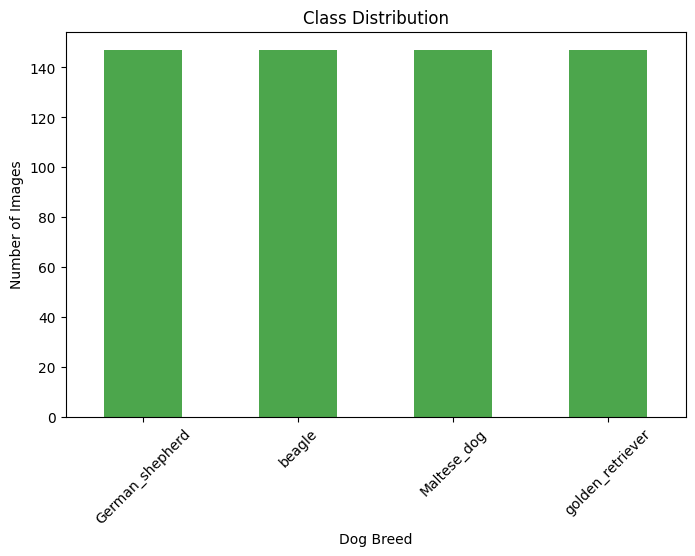

In [144]:
#class distribution

# Count the number of samples per breed
class_counts = data_df_concat['breed_name'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Class Distribution")
plt.xlabel("Dog Breed")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

In [145]:
IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS = 128, 128, 3
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 4

In [146]:
# Extract features (all columns except the last two)
X = data_df_concat.iloc[:, :-2]  # Keeps X as a DataFrame for easier inspection
print(f"Shape of X (features): {X.shape}")

# Extract labels (from the 'breed' column)
y = data_df_concat['breed']  # Keeps y as a pandas Series for easier handling
print(f"Shape of y (labels): {y.shape}")

Shape of X (features): (588, 49152)
Shape of y (labels): (588,)


In [147]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [148]:
X = X
y = to_categorical(y_encoded)  # Use the encoded labels

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (376, 49152), (376, 4)
Test set: (118, 49152), (118, 4)


In [149]:
import cv2 # Import the OpenCV library
import numpy as np
def image_processing(images, size=(128, 128), rotation_angle=0, equalization_clip_limit=0.03):
    processed_images = []
    for image in images:
        # Resize the image
        image = cv2.resize(image, size)

        # Rotate the image
        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
        image = cv2.warpAffine(image, M, (cols, rows))

        # Perform histogram equalization if requested
        if equalization_clip_limit is not None:
            # Convert the image to grayscale if necessary
            if len(image.shape) == 3:
                # Convert the image to uint8 before applying cvtColor
                image = (image * 255).astype(np.uint8)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Apply histogram equalization
            clahe = cv2.createCLAHE(clipLimit=equalization_clip_limit, tileGridSize=(8, 8))
            image = clahe.apply(image.astype(np.uint8))
            # Stack the image 3 times to re-create the 3 color channels
            image = np.dstack([image, image, image])

        processed_images.append(image)
    return processed_images

In [150]:
# Convert the list of images to a NumPy array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

X_train_reshaped = X_train.reshape(-1, 128, 128, 3)
X_test_reshaped = X_test.reshape(-1, 128, 128, 3)
X_val_reshaped = X_val.reshape(-1, 128, 128, 3)



In [151]:
# normalization
transformed_X_train = X_train_reshaped / 255.0
transformed_X_test = X_test_reshaped / 255.0
transformed_X_val = X_val_reshaped / 255.0

In [152]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow import keras
from tensorflow.keras.models import Sequential
import numpy as np

# Data Preparation
# Use ImageDataGenerator for data augmentation
data_augmentation = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create the data generator
augmented_data = data_augmentation.flow(transformed_X_train, y_train, batch_size=32)

# Model Design
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Adjust for number of classes
])



# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
history= model.fit(augmented_data, validation_data=(X_val_reshaped, y_val), epochs=20,
          callbacks=[early_stopping], class_weight=dict(enumerate(class_weights)))

# Use the reshaped and normalized validation data
# history = model.fit(augmented_data, validation_data=(X_val_reshaped, y_val), epochs=20, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4041 - loss: 3.7694 - val_accuracy: 0.5319 - val_loss: 3.2998
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4675 - loss: 2.9769 - val_accuracy: 0.5532 - val_loss: 3.3381
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5141 - loss: 2.4185 - val_accuracy: 0.5638 - val_loss: 3.8533
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5164 - loss: 2.0751 - val_accuracy: 0.4787 - val_loss: 4.3174
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5042 - loss: 1.8787 - val_accuracy: 0.4468 - val_loss: 5.1112
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5853 - loss: 1.6931 - val_accuracy: 0.5106 - val_loss: 5.1679


In [153]:
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")

Training accuracy: 0.5718085169792175


In [154]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(transformed_X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test set
y_pred = model.predict(transformed_X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.4338 - loss: 3.2052
Test Accuracy: 44.92%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.32      0.43        25
           1       0.00      0.00      0.00        34
           2       0.48      0.50      0.49        28
           3       0.40      1.00      0.57        31

    accuracy                           0.45       118
   macro avg       0.39      0.46      0.37       118
weighted avg       0.36      0.45      0.36       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


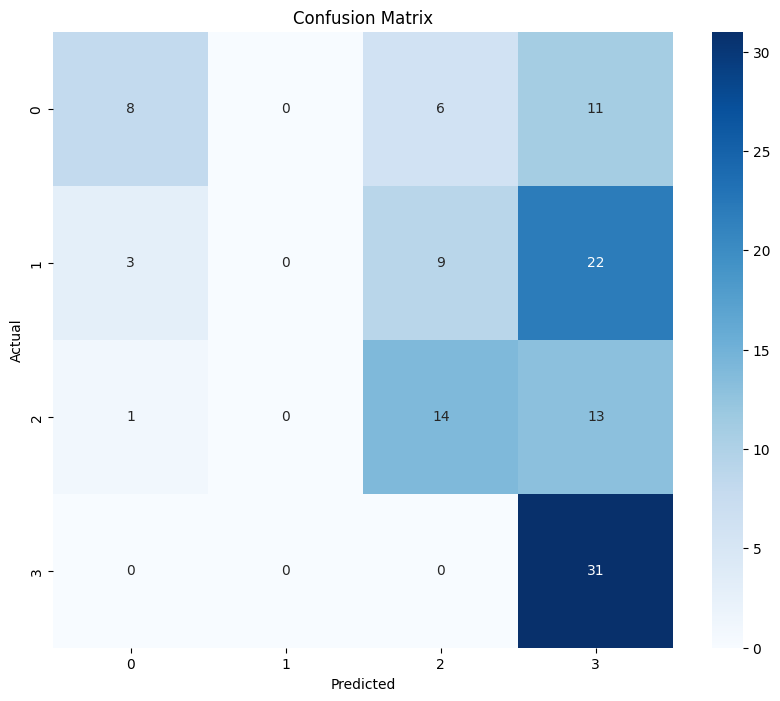

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[str(cls) for cls in label_encoder.classes_])) # Convert label_encoder.classes_ elements to strings

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(cls) for cls in label_encoder.classes_], yticklabels=[str(cls) for cls in label_encoder.classes_]) # Convert label_encoder.classes_ elements to strings for xticklabels and yticklabels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

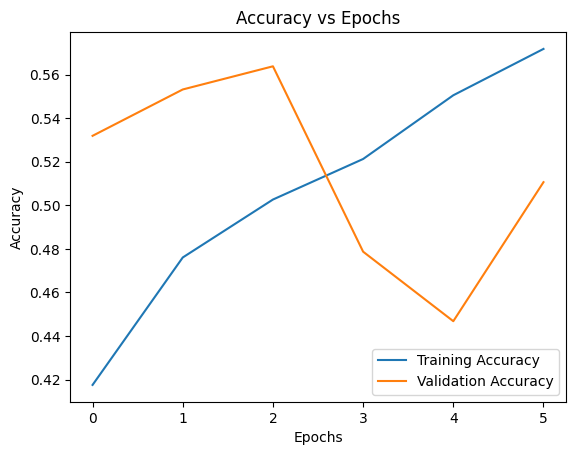

In [156]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()